In [8]:
# Instalar bibliotecas 
# !pip install tensorflow numpy pandas matplotlib seaborn scikit-learn

# Importar bibliotecas
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Mostrar versões
print("TensorFlow:", tf.__version__)
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", sns.__version__)

TensorFlow: 2.17.0
NumPy: 1.26.4
Pandas: 1.5.3
Matplotlib: 3.7.0
Seaborn: 0.12.2


## Parte 1 – Preparação dos Dados

Treino: (60000, 28, 28) Teste: (10000, 28, 28)


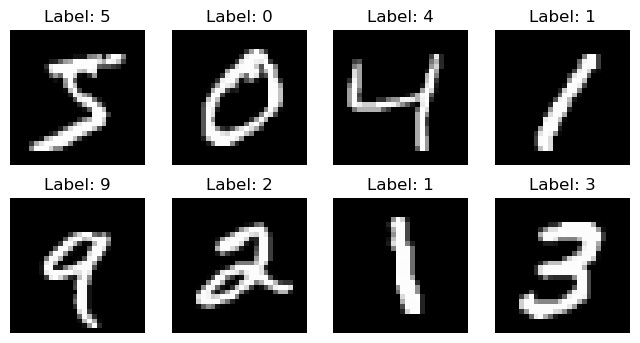

Valor médio: 0.13066062
Desvio padrão: 0.30810776


In [2]:
from tensorflow.keras.datasets import mnist

# Carregar os dados
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar (0–255 → 0–1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Visualizar dimensões
print("Treino:", X_train.shape, "Teste:", X_test.shape)

# Visualizar algumas imagens
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

# Estatísticas descritivas
print("Valor médio:", np.mean(X_train))
print("Desvio padrão:", np.std(X_train))

## Parte 2 – Implementação da Rede Neuronal

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense

# Criar modelo
model = Sequential([
    Input(shape=(28, 28)),                 # Camada de entrada explícita
    Flatten(),                             # Camada de achatamento
    Dense(128, activation='relu'),         # 1ª camada oculta
    Dense(64, activation='relu'),          # 2ª camada oculta
    Dense(10, activation='softmax')        # Camada de saída
])

# Compilar modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Parte 3 – Treino e Avaliação

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8980 - loss: 0.3689 - val_accuracy: 0.9460 - val_loss: 0.1903
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9562 - loss: 0.1483 - val_accuracy: 0.9623 - val_loss: 0.1281
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9695 - loss: 0.1032 - val_accuracy: 0.9693 - val_loss: 0.1124
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9766 - loss: 0.0790 - val_accuracy: 0.9697 - val_loss: 0.1026
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9821 - loss: 0.0610 - val_accuracy: 0.9739 - val_loss: 0.0943


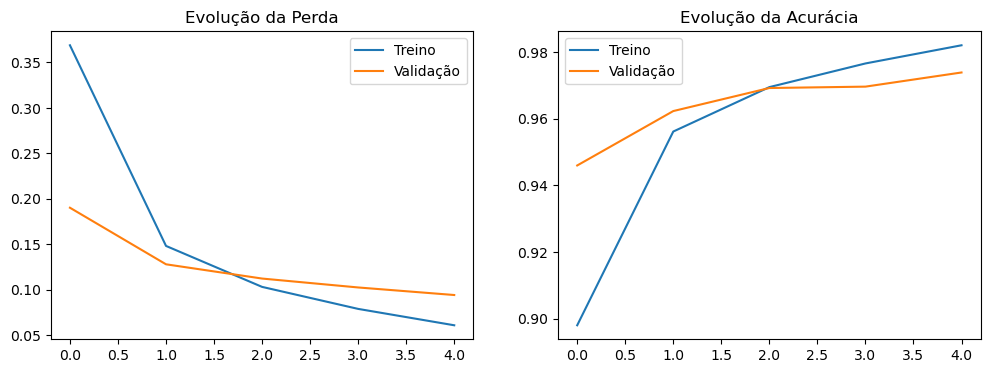

Acurácia no conjunto de teste: 0.9729
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


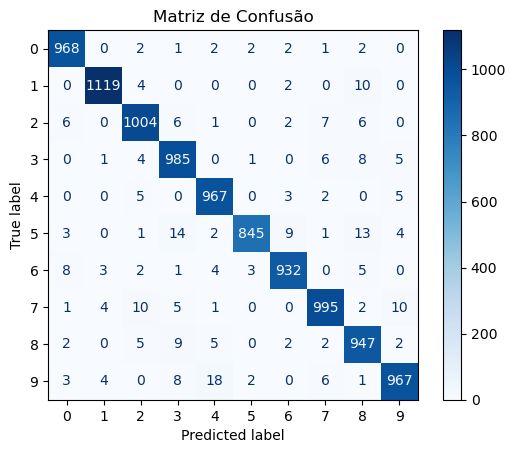

In [7]:
# Treinar modelo
history = model.fit(
    X_train, y_train,
    epochs=5,
    validation_split=0.2,
    batch_size=128
)

# Gráfico de treino
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Evolução da Acurácia')
plt.legend()
plt.show()

# Avaliar modelo no teste
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no conjunto de teste: {test_acc:.4f}")

# Matriz de confusão
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title("Matriz de Confusão")
plt.show()